<a href="https://colab.research.google.com/github/ednavivianasegura/AccesoImages/blob/main/ModelosNoSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025




# CURSO - PYTHON: PROGRAMACIóN DE IA

**Módulo: Aprendizaje no supervisado**

En el aprendizaje supervisado, el sistema aprende a partir de ejemplos etiquetados, es decir, datos donde ya conocemos la respuesta correcta. El objetivo es construir un modelo que prediga etiquetas para nuevos datos. Por ejemplo: clasificar correos como "spam" o "no spam" usando ejemplos previamente etiquetados.

En cambio, en el *aprendizaje no supervisado*, el sistema trabaja con datos sin etiquetas y busca patrones ocultos por sí mismo. Aquí no hay respuestas correctas de antemano; el algoritmo explora la estructura intrínseca de los datos. Un ejemplo típico es agrupar clientes con comportamientos similares sin conocer previamente las categorías.

<center>
 <img src="https://raw.githubusercontent.com/ednavivianasegura/AccesoImages/aaa31fdeb3eb3a27d54280be8b9e45614b9a634a/clustering_diferencias.png" alt="descriptiva" width="50%" height="50%">  
</center>
Imagen tomada de  [Unsupervised Learning with Python: A Beginner's Guide, Vihar Kurama](https://builtin.com/data-science/unsupervised-learning-python)




**Objetivos:**

- Encontrar estructuras ocultas en los datos.

- Agrupar datos similares (clustering).

- Reducir la dimensionalidad para visualización o eficiencia.

**Aplicaciones:** Segmentación de clientes, detección de anomalías, compresión de imágenes, etc.



## Clustering

El clustering (o agrupamiento) es una técnica de aprendizaje no supervisado cuyo objetivo es dividir un conjunto de datos en grupos homogéneos (llamados clusters), de tal manera que:

* Intra-cluster: Los puntos dentro de un mismo cluster sean similares entre sí (minimizar varianza interna).

* Inter-cluster: Los puntos de clusters distintos sean diferentes (maximizar distancia entre clusters).

## Tipos de Clustering

Existen dos enfoques principales, diferenciados por su estructura y forma de asignar clusters:

### Clustering Jerárquico

Construye una jerarquía de clusters representada como un árbol (dendrograma), donde cada nodo es una fusión o división de clusters.

**Subtipos:**

* Agglomerativo (bottom-up): Cada punto inicia como un cluster y se fusionan iterativamente.

* Divisivo (top-down): Todos los puntos inician en un cluster y se dividen recursivamente.

**Ventaja:** No requiere especificar el número de clusters a priori.

### Clustering No Jerárquico

Asigna puntos a clusters directamente, sin estructura jerárquica. Los clusters son planos y definitivos.

**Algoritmos comunes:**

* K-means: Minimiza la varianza intra-cluster.

* DBSCAN: Basado en densidad y detección de outliers.

**Ventaja:** Computacionalmente eficiente para grandes conjuntos de datos.


In [18]:
# @title Librerías ecesarias


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


1. **Cluster jerárquico o aglomerativo:**

Imaginemos que somos nutricionistas investigando la relación entre peso y estatura en un grupo de pacientes. Contamos con datos de 200 personas (peso en kg y estatura en cm), pero no tenemos información previa sobre categorías como *bajo peso*, *peso normal* o *sobrepeso*. Nuestro objetivo es descubrir si existen grupos naturales en estos datos que nos permitan identificar patrones relevantes para personalizar planes alimenticios."


Supongamos que los datos provienen de chequeos médicos rutinarios en una clínica de nutrición durante el último año. Cada registro contiene:

* Peso (kg): Variable numérica continua

* Estatura (cm): Variable numérica continua

Actualmente, la clínica clasifica manualmente a los pacientes en tres categorías de peso según tablas de IMC, pero sospechamos que podrían existir subgrupos más específicos que requieran intervenciones diferenciadas.

* Utilizaremos clustering jerárquico para identificar grupos naturales sin imponer categorías preconcebidas

* Visualizar cómo se relacionan las observaciones

* Determinar si las agrupaciones coinciden con las categorías tradicionales de IMC"




GENERACIÓN Y PREPARACIÓN DE DATOS


VISUALIZACIÓN INICIAL DE DATOS



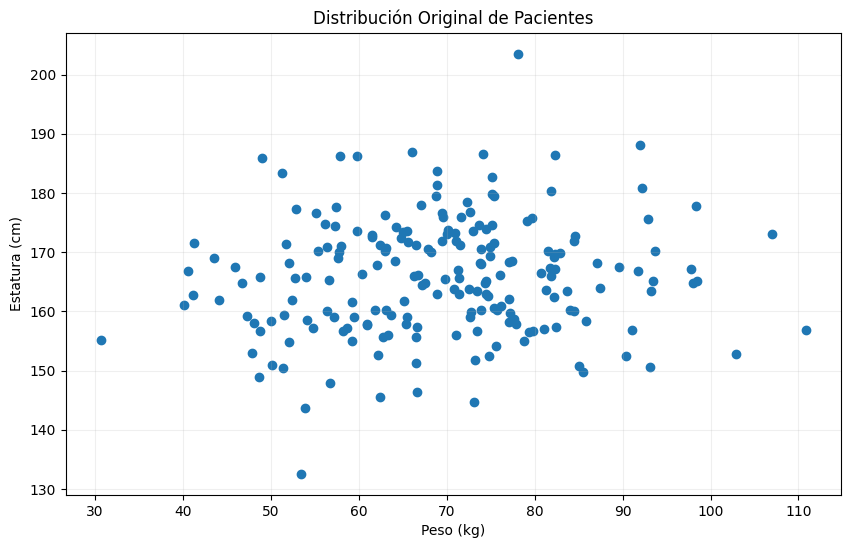


CLUSTERING JERÁRQUICO (AGGLOMERATIVE)


VISUALIZACIÓN DE RESULTADOS



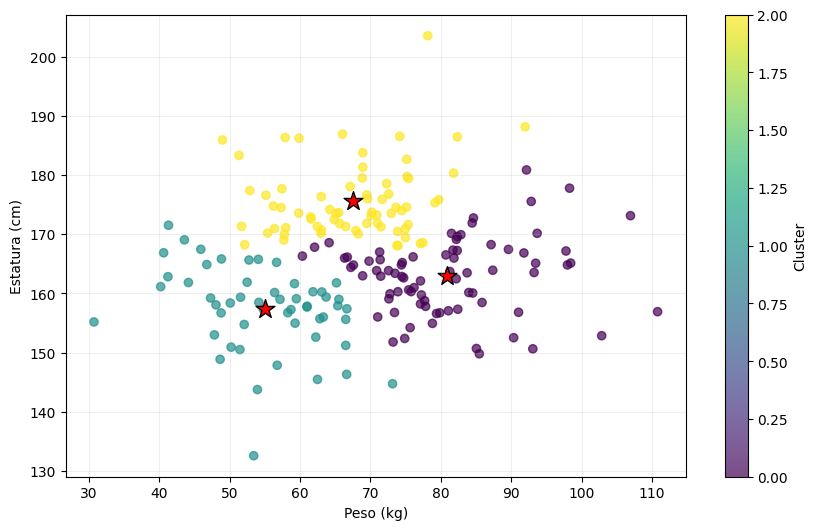


DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)



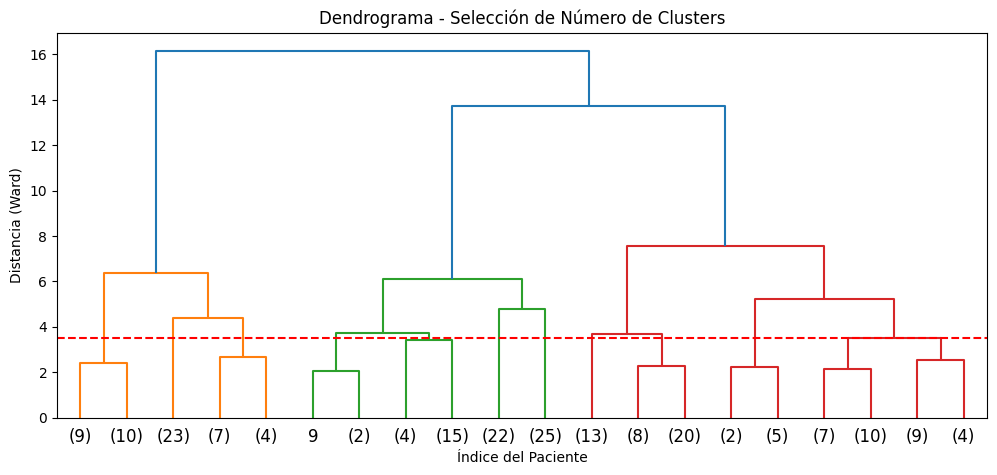


ANÁLISIS ESTADÍSTICO POR CLUSTER

              Peso               Estatura          
              mean        std        mean       std
Cluster                                            
0        80.860876  10.278954  162.965626  6.281787
1        54.965663   8.709041  157.418499  7.077869
2        67.497951   8.738286  175.612132  6.359663


In [3]:
# =============================================
# 1. GENERACIÓN Y PREPARACIÓN DE DATOS
# =============================================

print()
print('GENERACIÓN Y PREPARACIÓN DE DATOS')
print()

# Semilla para reproducibilidad
np.random.seed(42)  # Fija la semilla aleatoria para que los resultados sean consistentes

# Datos simulados de peso (kg) y estatura (cm)
pesos = np.random.normal(
    loc=70,    # Media de la distribución normal (70 kg)
    scale=15,   # Desviación estándar (dispersión de 15 kg)
    size=200    # 200 muestras
)

estaturas = np.random.normal(
    loc=165,    # Media de 165 cm
    scale=10,    # Desviación estándar de 10 cm
    size=200     # 200 muestras
)

# Combinar las dos variables en una matriz de 200x2
X = np.column_stack((pesos, estaturas))  # Cada fila es un paciente, columnas: [peso, estatura]

# Escalado de datos (normalización)
scaler = StandardScaler()  # Crea un objeto para estandarizar (media=0, desviación=1)
X_scaled = scaler.fit_transform(X)  # Aplica la transformación a los datos

# =============================================
# 2. VISUALIZACIÓN INICIAL DE DATOS
# =============================================

print()
print('VISUALIZACIÓN INICIAL DE DATOS')
print()

plt.figure(figsize=(10, 6))
plt.scatter(
    X[:, 0],  # Eje X: pesos
    X[:, 1],  # Eje Y: estaturas
)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Distribución Original de Pacientes')
plt.grid(True, alpha=0.2)
plt.show()

# =============================================
# 3. CLUSTERING JERÁRQUICO (AGGLOMERATIVE)
# =============================================

print()
print('CLUSTERING JERÁRQUICO (AGGLOMERATIVE)')
print()

# Configuración del modelo
cluster_jerarquico = AgglomerativeClustering(
    n_clusters=3,       # Número final de clusters a obtener
    metric='euclidean',  # Métrica de distancia entre puntos (distancia euclidiana)
    linkage='ward'       # Criterio para fusionar clusters:
    # linkage='ward': Minimiza la varianza de los clusters que se fusionan, produciendo clusters más compactos.
    # Alternativas comunes:
    #'complete': Usa la distancia máxima entre puntos.
    #'average': Usa la distancia promedio.
)

# Aplicar el clustering a los datos escalados
etiquetas = cluster_jerarquico.fit_predict(X_scaled)  # Retorna un array con las etiquetas de cluster (0, 1, 2)

# =============================================
# 4. VISUALIZACIÓN DE RESULTADOS
# =============================================

print()
print('VISUALIZACIÓN DE RESULTADOS')
print()

plt.figure(figsize=(10, 6))
# Graficar puntos coloreados por cluster
plt.scatter(
    X[:, 0],           # Peso en kg (eje X)
    X[:, 1],           # Estatura en cm (eje Y)
    c=etiquetas,       # Color según etiqueta de cluster
    cmap='viridis',    # Mapa de colores
    alpha=0.7          # Transparencia para mejor visualización
)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.colorbar(label='Cluster')  # Barra lateral que indica el mapeo de colores
plt.grid(True, alpha=0.2)

# Calcular y graficar centroides
for cluster_id in np.unique(etiquetas):
    centroide = X[etiquetas == cluster_id].mean(axis=0)  # Calcula la media de cada variable por cluster
    plt.scatter(
        centroide[0],          # Peso promedio del cluster
        centroide[1],          # Estatura promedio del cluster
        marker='*',            # Forma de estrella para el centroide
        s=200,                 # Tamaño del marcador
        c='red',               # Color rojo
        edgecolor='black'      # Borde negro para mejor contraste
    )
plt.show()

# =============================================
# 5. DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)
# =============================================

print()
print('DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)')
print()

# Calcular la matriz de linkage (pasos de fusión)
Z = linkage(
    X_scaled,          # Datos escalados
    method='ward'      # Mismo método que en el clustering
)

# Configurar el dendrograma
plt.figure(figsize=(12, 5))
dendrogram(
    Z,                          # Matriz de linkage
    truncate_mode='lastp',      # Mostrar solo los últimos p clusters fusionados
    p=20,                      # Número de clusters mostrados
    show_leaf_counts=True       # Mostrar conteo de hojas en cada rama
)
# Línea horizontal para sugerir número de clusters
plt.axhline(
    y=3.5,                     # Altura donde cortar el dendrograma
    color='r',                 # Color rojo
    linestyle='--'             # Línea discontinua
)
plt.title('Dendrograma - Selección de Número de Clusters')
plt.xlabel('Índice del Paciente')
plt.ylabel('Distancia (Ward)')  # Distancia entre clusters fusionados
plt.show()

# =============================================
# 6. ANÁLISIS ESTADÍSTICO POR CLUSTER
# =============================================

print()
print('ANÁLISIS ESTADÍSTICO POR CLUSTER')
print()

# Convertir a DataFrame para análisis
df = pd.DataFrame(X, columns=['Peso', 'Estatura'])
df['Cluster'] = etiquetas  # Añadir columna de clusters

# Estadísticas descriptivas por cluster
print(df.groupby('Cluster').agg({
    'Peso': ['mean', 'std'],      # Media y desviación estándar del peso
    'Estatura': ['mean', 'std']   # Media y desviación estándar de la estatura
}))


2. **Cluster no jerárquico: K-Means**

**Objetivo:** Dividir datos en k grupos (clusters) donde cada punto pertenece al grupo con la media (centroide) más cercana.

**Pasos:**

* Seleccionar k centroides aleatorios.

* Asignar cada punto al centroide más cercano.

* Recalcular los centroides.

* Repetir hasta convergencia.


Comparación de centroides:
K-means:
         Peso    Estatura
0  55.011524  157.776637
1  67.344136  175.819800
2  81.463014  162.834740


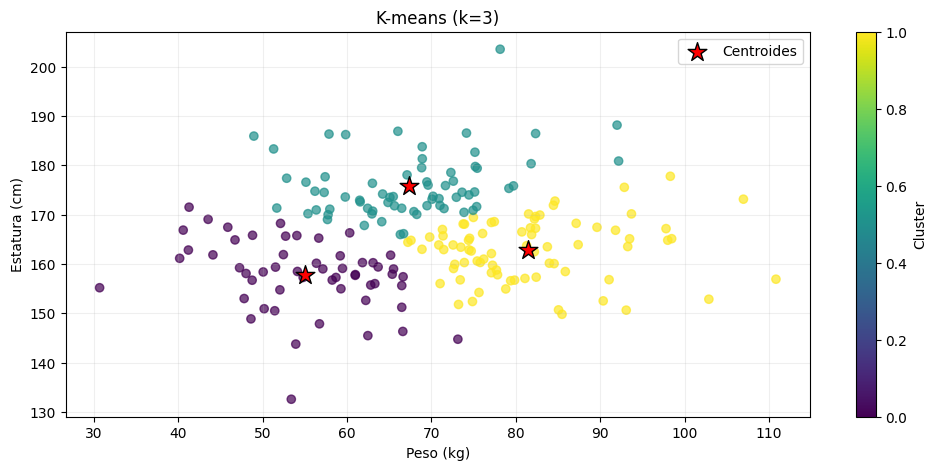

In [10]:
# --------------------------------------------
# 2. Aplicación de K-means
# --------------------------------------------
kmeans = KMeans(
    n_clusters=3,       # Número de clusters (k=3 como en el ejemplo jerárquico)
    init='k-means++',   # Método inteligente para inicializar centroides
    n_init=10,          # Número de inicializaciones diferentes (evita resultados subóptimos)
    max_iter=300,       # Máximo iteraciones por ejecución
    random_state=42     # Semilla para reproducibilidad
)
# n_clusters=3	Número de clusters (equivalente al usado en el jerárquico).
# init='k-means++'	Inicializa centroides lejanos entre sí para evitar malas convergencias.
# n_init=10	Ejecuta el algoritmo 10 veces con distintas inicializaciones y elige el mejor resultado.
# max_iter=300	Número máximo de iteraciones por ejecución.

# Entrenamiento y predicción
etiquetas_kmeans = kmeans.fit_predict(X_scaled)
centroides_kmeans = scaler.inverse_transform(kmeans.cluster_centers_)  # Centroides en escala original

# --------------------------------------------
# 3. Visualización de resultados
# --------------------------------------------
plt.figure(figsize=(12, 5))

# Gráfico de K-means
plt.scatter(X[:, 0], X[:, 1], c=etiquetas_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(centroides_kmeans[:, 0], centroides_kmeans[:, 1],
            marker='*', s=200, c='red', edgecolor='black', label='Centroides')
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('K-means (k=3)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(alpha=0.2)

# --------------------------------------------
# 4. Análisis comparativo
# --------------------------------------------
print("\nComparación de centroides:")
print("K-means:\n", pd.DataFrame(centroides_kmeans, columns=['Peso', 'Estatura']))

### **Introducción a la Selección del Número Óptimo de Clusters**

En el aprendizaje no supervisado, específicamente en problemas de clustering, uno de los desafíos fundamentales es determinar el número adecuado de grupos (*k*) que existen naturalmente en los datos. A diferencia del aprendizaje supervisado, donde contamos con etiquetas que guían el proceso, en clustering debemos descubrir esta estructura oculta mediante métodos analíticos.

La elección incorrecta de *k* puede llevar a:
- **Sub-segmentación** (*k* demasiado bajo): Grupos heterogéneos que pierden patrones importantes.
- **Sobre-segmentación** (*k* demasiado alto): Grupos artificiales sin significado real, aumentando la complejidad del modelo.

Para abordar este problema, existen métodos cuantitativos y visuales que nos ayudan a tomar esta decisión de manera objetiva. Dos de las técnicas más utilizadas son:

1. **Método del Codo (Elbow Method)**: Un enfoque visual que analiza cómo mejora la cohesión de los clusters al aumentar *k*.
2. **Silhouette Score**: Una medida cuantitativa que evalúa tanto la cohesión interna como la separación entre clusters.

En el contexto de nuestro estudio con datos de peso y estatura, aplicaremos estos métodos para identificar cuántos grupos naturales de pacientes existen según sus características antropométricas, información valiosa para personalizar tratamientos o recomendaciones de salud. A continuación, exploraremos en detalle cada uno de estos métodos.

1. Método del Codo (Elbow Method) tiene como objetivo determinar el número óptimo de clusters (k) en algoritmos como K-means, evaluando la relación entre la varianza intra-cluster y el número de clusters.

En primer lugar, la inercia (Suma de Cuadrados Intra-Cluster, WCSS) es la medida de cohesión que calcula la suma de las distancias al cuadrado entre cada punto y su centroide.
Al incrementar k, la inercia disminuye (cada cluster es más compacto). El punto óptimo se encuentra donde la reducción de inercia comienza a ser marginal (forma de "codo" en la curva).

2. Silhouette Score tiene como objetivo evaluar la calidad de los clusters midiendo cuán bien separados están y cuán cohesionados internamente.

Para cada punto xi:

* Distancia intra-cluster (ai): promedio de distancias entre xi y todos los puntos en su mismo cluster.

* Distancia inter-cluster (bi): promedio de distancias entre xi y todos los puntos en el cluster más cercano (distinto al suyo).

si∈[−1,1]:

* Cercano a 1: El punto está bien asignado (lejos de clusters vecinos).

+ Cercano a 0: El punto está en la frontera entre clusters.

+ Cercano a -1: El punto está mal asignado (más cerca de otro cluster).

El Silhouette Score global es el promedio de si para todos los puntos.

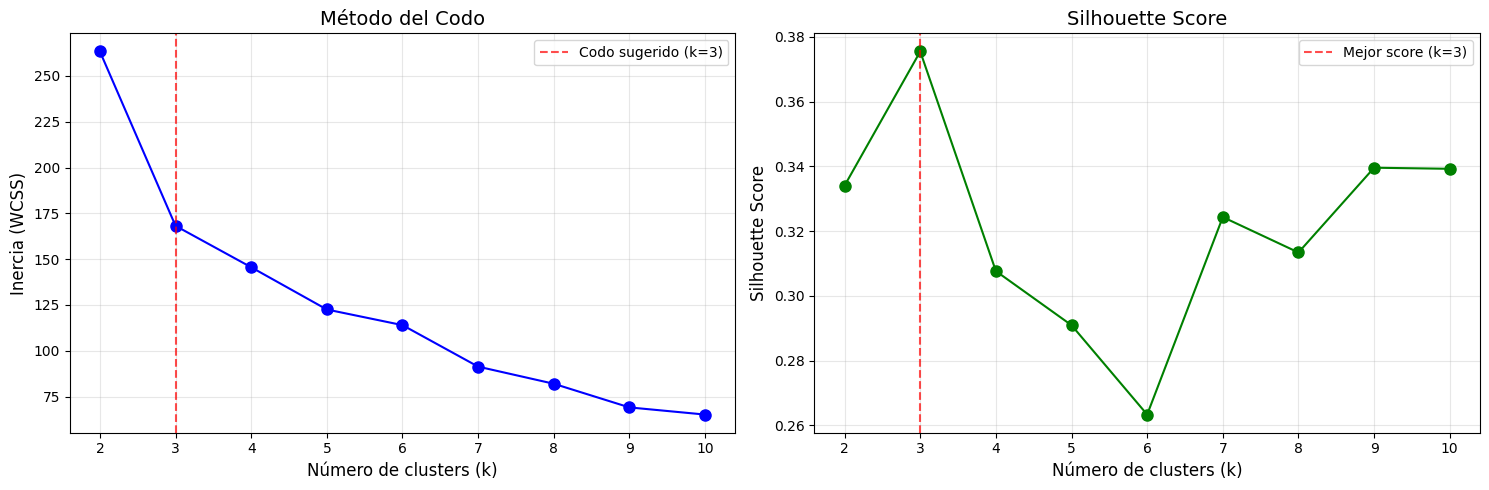

In [17]:
# =============================================
# Configuración de rango de k's a evaluar
# =============================================

k_range = range(2, 11)  # Creamos un rango de valores para k (número de clusters) desde 2 hasta 10


# =============================================
# Cálculo de métricas
# =============================================

inercias = []          # Lista para almacenar la inercia (WCSS) para cada k
silhouette_scores = []  # Lista para almacenar los puntajes de silueta para cada k

for k in k_range:
    # Inicializamos KMeans con:
    # - n_clusters=k: número de clusters a formar
    # - random_state=42: semilla para reproducibilidad
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Ajustamos el modelo y predecimos las etiquetas de cluster
    etiquetas = kmeans.fit_predict(X_scaled)

    # Almacenamos la inercia (suma de distancias al cuadrado intra-cluster)
    inercias.append(kmeans.inertia_)  # WCSS

    # Calculamos y almacenamos el silhouette score para este k
    # - X_scaled: datos estandarizados
    # - etiquetas: asignaciones de cluster predichas
    silhouette_scores.append(silhouette_score(X_scaled, etiquetas))

# Creamos una figura de 15x5 pulgadas para los subplots
plt.figure(figsize=(15, 5))

# =============================================
# Gráfico del Método del Codo (subplot izquierdo)
# =============================================
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1

# Graficamos la curva del codo:
# - k_range en eje X, inercias en eje Y
# - 'bo-': puntos azules con línea continua
# - markersize=8: tamaño de los puntos
plt.plot(k_range, inercias, 'bo-', markersize=8)

# Línea vertical roja punteada para marcar el codo sugerido
plt.axvline(x=3, color='r', linestyle='--', alpha=0.7, label='Codo sugerido (k=3)')

# Etiquetas y título
plt.xlabel('Número de clusters (k)', fontsize=12)
plt.ylabel('Inercia (WCSS)', fontsize=12)
plt.title('Método del Codo', fontsize=14)

# Configuramos ticks en el eje X para que coincidan con los valores de k probados
plt.xticks(k_range)

# Añadimos una cuadrícula semitransparente
plt.grid(alpha=0.3)

# Mostramos la leyenda
plt.legend()

# =============================================
# Gráfico del Silhouette Score (subplot derecho)
# =============================================
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2

# Graficamos los silhouette scores:
# - k_range en eje X, silhouette_scores en eje Y
# - 'go-': puntos verdes con línea continua
plt.plot(k_range, silhouette_scores, 'go-', markersize=8)

# Línea vertical roja punteada para marcar el mejor score
plt.axvline(x=3, color='r', linestyle='--', alpha=0.7, label='Mejor score (k=3)')

# Etiquetas y título
plt.xlabel('Número de clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score', fontsize=14)

# Configuramos ticks en el eje X
plt.xticks(k_range)

# Añadimos cuadrícula
plt.grid(alpha=0.3)

# Mostramos la leyenda
plt.legend()

# Ajustamos el layout para que no se solapen los elementos
plt.tight_layout()

# Mostramos la figura con ambos gráficos
plt.show()

## Análisis de componentes principales (PCA)

El Análisis de Componentes Principales (PCA) es una técnica fundamental de reducción de dimensionalidad en el aprendizaje automático y la estadística. Su objetivo es transformar un conjunto de variables correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas componentes principales, ordenadas por la cantidad de varianza que explican en los datos originales.

¿Por qué usar PCA?
* Simplificar datos complejos: reduce el número de variables manteniendo la mayor información posible.

* Visualizar datos multidimensionales: permite proyectar datos en 2D o 3D para su exploración visual.

* Eliminar ruido y redundancia: Los componentes menos importantes suelen capturar ruido o información repetida.


**Aplicación en el Ejemplo de Peso y Estatura**

Para nuestros datos de pacientes:

Variables originales: Peso (kg) y Estatura (cm).

Problema: Aunque solo son 2 variables, PCA nos ayuda a:

Entender cuál variable contribuye más a la variabilidad.

Reducir a 1 componente si ambas están altamente correlacionadas.


In [19]:
# Aplicar PCA (sin reducir aún)
pca = PCA()                     # Inicializa sin especificar componentes
componentes = pca.fit_transform(X_scaled)  # Datos estandarizados

# Varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.54757334 0.45242666]


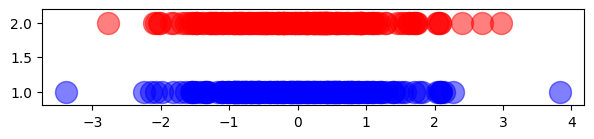

Varianza explicada por cada componente: [1.10064993 0.90940032]
Proporción de varianza explicada por cada componente: [0.54757334 0.45242666]


In [22]:
# Código de visualización
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(X_scaled[:, 0], [2]*X_scaled[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(X_scaled[:, 1], [1]*X_scaled[:, 1].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)